# Analyze output from RTS GAN for stocks (their dataset)

## Code from TimeGAN
Apr 3, 2024

In [1]:
## Necessary packages
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pickle
import sys
import pandas as pd

# 3. Metrics
from visualization_metrics import *


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib widget

## Data Loading

Load original dataset and preprocess the loaded data.

- data_name: 
- seq_len: sequence length of the time-series data

### Training data 

In [6]:
## Data loading using RTS gan method. Same data 

sys.path.append('../')
from stock_energy.missingprocessor import Processor

data_path = "../../TimeGAN/data"
loc = "stock"
seq_len = 24
df = pd.read_csv('{}/{}_data.csv'.format(data_path,loc), sep = ",")
types = ["continuous" for i in range(len(df.columns))]

P = Processor(types)
# Flip the data to make chronological data
ori_data = P.fit_transform(df)
ori_data = ori_data[::-1]

temp_data = [ori_data[i:i + seq_len] for i in range(0, len(ori_data) - seq_len)]   

train_data = np.array(temp_data)


Open 1 None continuous
High 1 None continuous
Low 1 None continuous
Close 1 None continuous
Adj_Close 1 None continuous
Volume 1 None continuous


### Generated data 

In [7]:
## Load generated data 
root_dir='/Users/venkitesh_work/Documents/work/Sapient_AI/Data/repos/rts_gan/stock_result/'

fname='stock_1_stocks_test/data'
with open("{0}/{1}".format(root_dir,fname), "rb") as f:
    result = pickle.load(f)
gen_data=np.array(result)


In [8]:
## Or just take a different set of training data 
# gen_data = train_data[200:400]
# train_data=train_data[:200]
# train_data=train_data[200:400]

print(train_data.shape,gen_data.shape)

(3661, 24, 6) (3661, 24, 6)


## Evaluate the generated data

### 3. Visualization

We visualize the original and synthetic data distributions using PCA and tSNE analysis.

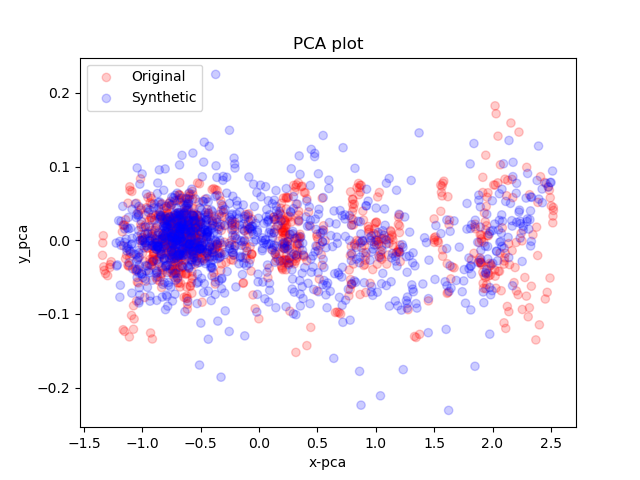

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.000s...
[t-SNE] Computed neighbors for 2000 samples in 0.037s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.031639
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.451038
[t-SNE] KL divergence after 300 iterations: 1.045329


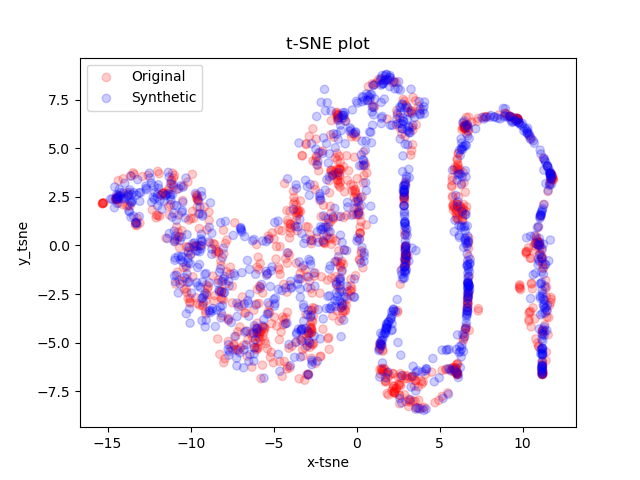

In [9]:
visualization(train_data, gen_data, 'pca')
visualization(train_data, gen_data, 'tsne')